In [1]:
%matplotlib inline
import astropy as ast
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.utils.data import download_file
from matplotlib.colors import LogNorm
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve, convolve_fft
from photutils.psf import create_matching_kernel, TopHatWindow, CosineBellWindow

In [2]:
tab_coorx = []
tab_coory = []
tab_nom = []

with open('/home/selin/Documents/M33/M33 SW/WRlistSWpx','r') as a_file :
    
    for line in a_file :
        line = line.split(',')
        tab_coorx.append(int(float(line[1])))
        tab_coory.append(int(float(line[0])))
        tab_nom.append(line[2])
        
tab_coorx = np.asarray(tab_coorx)
tab_coory = np.asarray(tab_coory)

In [3]:
nonan_6563 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_6563.fits')
nonan_6584 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_6584.fits')
nonan_SII = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_SII.fits')

nonan_4861 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_4861.fits')
nonan_4959 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_4959.fits')
nonan_OII = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_OII.fits')
nonan_5007 = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_5007.fits')

In [ ]:
6,9,14-16,18,21,24,28,30,33,39,42,43

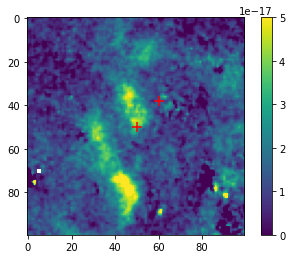

In [9]:
for i in [16]:
    
    coorx = tab_coorx[i]
    coory = tab_coory[i]
    nom = tab_nom[i]
    
    fig = plt.figure()
    image_cropped = nonan_4861[coorx-50:coorx+50,coory-50:coory+50]
    image_cropped = np.flipud(image_cropped)
    maxim =0.5e-16
    plt.imshow(image_cropped,cmap='viridis',vmin = 0, vmax = maxim)
    plt.scatter(50,50, s=100,marker="+" , color = "r")
    plt.scatter(+tab_coory[14]-tab_coory[16]+50,-tab_coorx[14]+tab_coorx[16]+50, s=100,marker="+" , color = "r")
    #plt.scatter(+tab_coory[19]-tab_coory[18]+50,-tab_coorx[19]+tab_coorx[18]+50, s=100,marker="+" , color = "r")
    plt.colorbar()
    plt.clim(0,maxim)
    plt.savefig("4861_{}.png".format(nom))

In [4]:
lim=0.5e-17

#nonan_velo = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_velocity.fits')
#sigma, hdr= fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/M33SE-sigma.fits', header=True)

nonan_NII_Halpha = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_NII_Halpha.fits')
nonan_SII_Halpha = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_SII_Halpha.fits')
nonan_SII_ratio = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_SII_ratio.fits')
nonan_Halpha_Hbeta = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_Halpha_Hbeta.fits')
nonan_OIII_OII = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_OIII_OII.fits')
nonan_OIII_Hbeta = fits.getdata('/home/selin/Documents/M33/M33 SW/Fits/NoNan_OIII_Hbeta.fits')

#sigma2=np.copy(sigma)
#sigma2[nonan_6563<lim]=np.nan


In [118]:
i = 43
coorx = tab_coorx[i]
coory = tab_coory[i]
coord_thresh = []
thresh = 2e-17

for i in range(coorx-50,coorx+50):
    for j in range(coory-50,coory+50):
        if nonan_OII[i,j] < thresh :
            coord_thresh.append([i,j])
            
nonan_NII_OII_clean = nonan_NII_OII
            
for [i,j] in coord_thresh :
    nonan_NII_OII_clean[i,j] = np.nan

In [ ]:
6,9,14-16,18,21,24,28,30,33,39,42,43

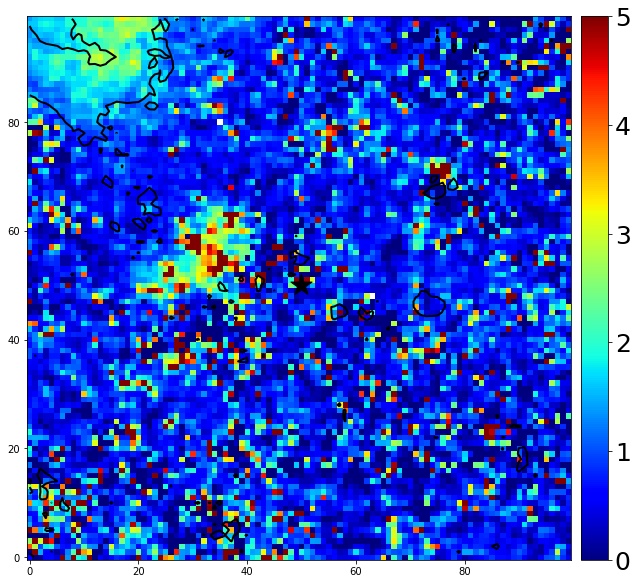

In [15]:
for i in [38]:
    
    coorx = tab_coorx[i]
    coory = tab_coory[i]
    nom = tab_nom[i]   
    fig1 = plt.figure(figsize=(18,10))
    
    plt.scatter(50,50, s=500,marker="*",color = "k")
    #plt.scatter(+tab_coory[16]-tab_coory[14]+50,+tab_coorx[16]-tab_coorx[14]+50, s=500,marker="*" , color = "k")
    #plt.scatter(+tab_coory[19]-tab_coory[18]+50,+tab_coorx[19]-tab_coorx[18]+50, s=500,marker="*" , color = "k")
    plt.imshow(nonan_OIII_Hbeta[coorx-50:coorx+50,coory-50:coory+50],cmap='jet',origin='lower',vmin =0, vmax =5)
    cbar=plt.colorbar(pad=0.01)
    cbar.ax.tick_params(labelsize=25)
    v=np.array([1.1e-17,5e-17,1e-16,4e-16,1e-15])
    plt.contour(nonan_6563[coorx-50:coorx+50,coory-50:coory+50], v,colors='Black',linestyles='solid',linewidths=2)
    plt.savefig("OIII_Hbeta_{}.png".format(nom))